# K-Means Clustering

# Importing Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as  plt
import pandas as pd

# Importing the Dataset


In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:, [3, 4] ].values # Select columns in index 3 & 4 (Annual INcome & Spending Scoe)

# Using the Elbow Method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

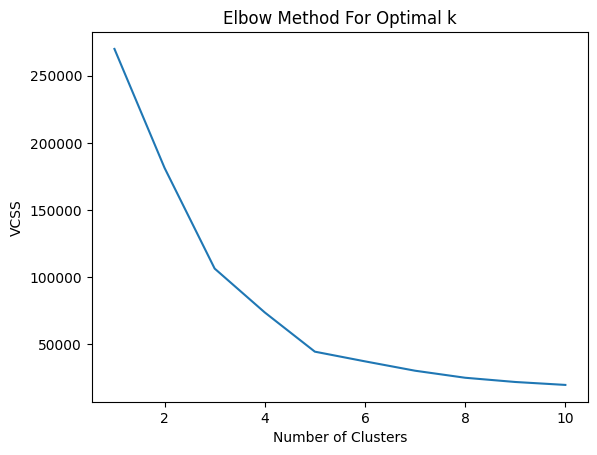

In [3]:
from sklearn.cluster import KMeans
from sklearn import datasets

vcss = []
# iterating to a loop with the possible number of clusters that i want to try
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42) #Kmeans ++ to avoid random initialization of the centroid
    kmeans.fit(x)
    vcss.append(kmeans.inertia_)

plt.plot(range(1,11), vcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('VCSS')
plt.show()

#Result: the optimal number of clusters are 5, the point where the line dramatically decreases

# Training the K-Means algorithm on the dataset

In [4]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state=42) #Kmeans ++ to avoid random initialization of the centroid
y_kmeans = kmeans.fit_predict(x) # trains, and returns the dependent variable that we want to create.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


# Visualizing the Clusters

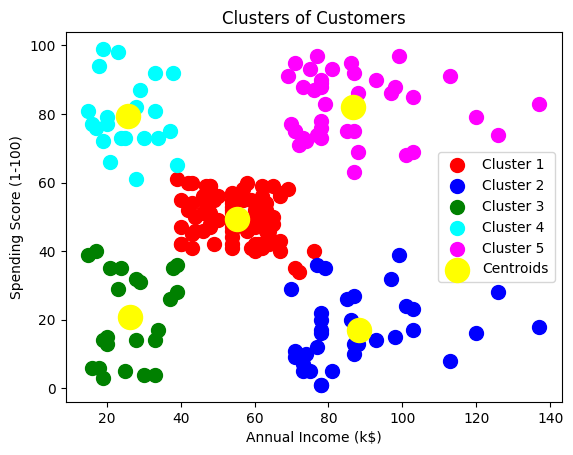

In [7]:
plt.scatter(x[ y_kmeans == 0 ,0], x[ y_kmeans == 0 , 1], s = 100, c = 'red', label = 'Cluster 1 ') # get customers that belong to cluster 0. The second parameters 0 and 1 represents the 2 columsn taht we choose from above (anual income and spending score)
plt.scatter(x[ y_kmeans == 1 ,0], x[ y_kmeans == 1 , 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[ y_kmeans == 2 ,0], x[ y_kmeans == 2 , 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[ y_kmeans == 3 ,0], x[ y_kmeans == 3 , 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[ y_kmeans == 4 ,0], x[ y_kmeans == 4 , 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()